<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-05-17 15:37:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.1MB/s    in 3.4s    

2025-05-17 15:37:43 (44.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



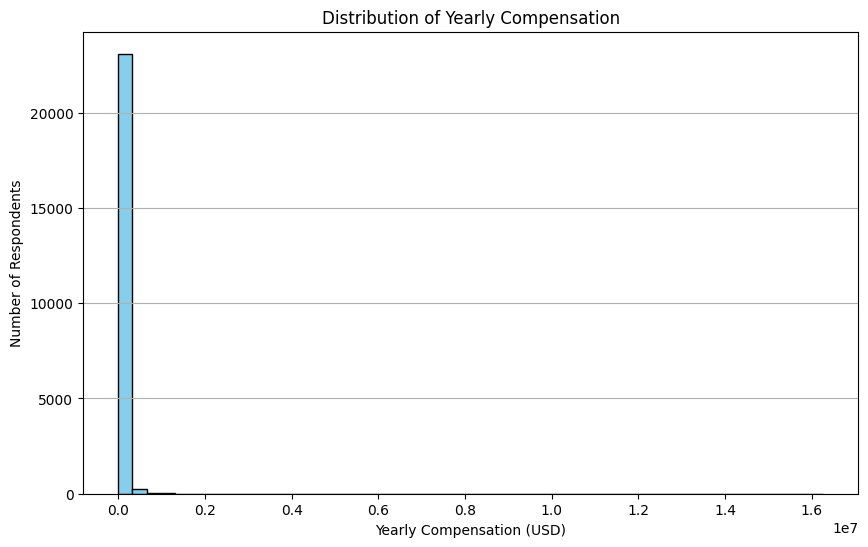

In [4]:
## Write your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Yearly Compensation')
plt.grid(axis='y')
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



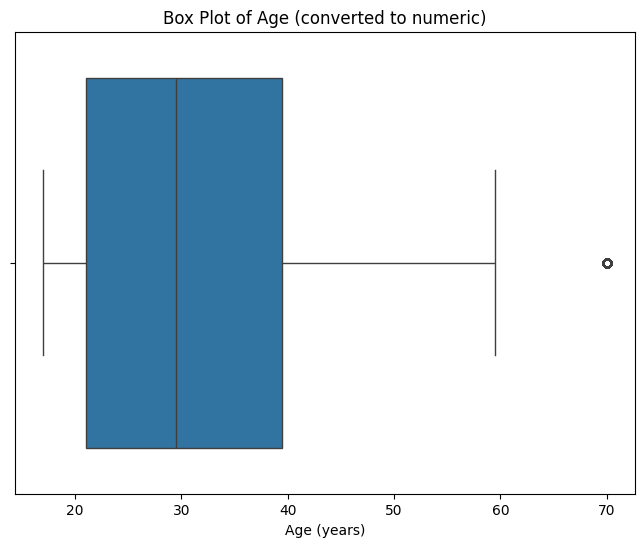

In [6]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping from age group to numeric midpoint or order
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None  # We will exclude these from the plot
}

# Create a new numeric Age column based on the mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where Age_numeric is None (missing or 'Prefer not to say')
df_age = df.dropna(subset=['Age_numeric'])

#Plot the box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df_age['Age_numeric'])
plt.xlabel('Age (years)')
plt.title('Box Plot of Age (converted to numeric)')
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



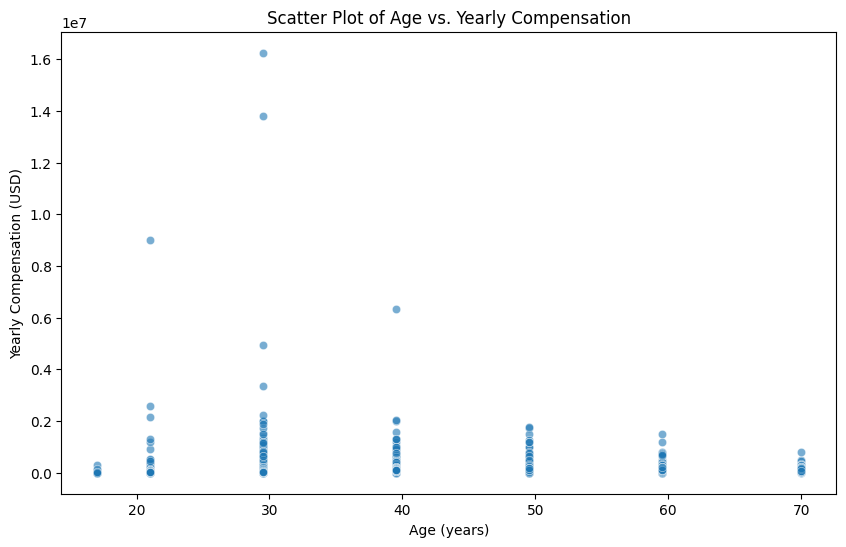

In [7]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in Age_numeric or ConvertedCompYearly
df_scatter = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_numeric', y='ConvertedCompYearly', data=df_scatter, alpha=0.6)

plt.xlabel('Age (years)')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


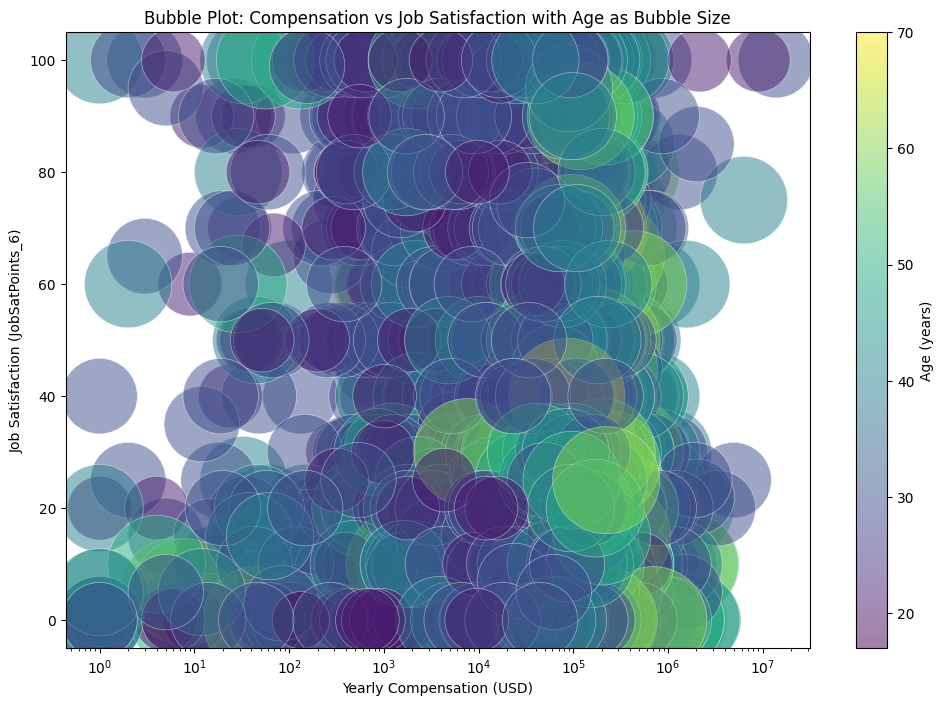

In [8]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop rows with missing values in relevant columns
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

plt.figure(figsize=(12,8))

# Normalize Age_numeric for bubble sizes (optional: scale for better visualization)
size_scale = 100  # adjust scale for bubble sizes
bubble_sizes = df_bubble['Age_numeric'] * size_scale

plt.scatter(
    x=df_bubble['ConvertedCompYearly'],
    y=df_bubble['JobSatPoints_6'],
    s=bubble_sizes,
    alpha=0.5,
    c=df_bubble['Age_numeric'],  # color bubbles by age for extra dimension
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Bubble Plot: Compensation vs Job Satisfaction with Age as Bubble Size')
plt.colorbar(label='Age (years)')

plt.xscale('log')  # optional, compensation usually varies widely
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



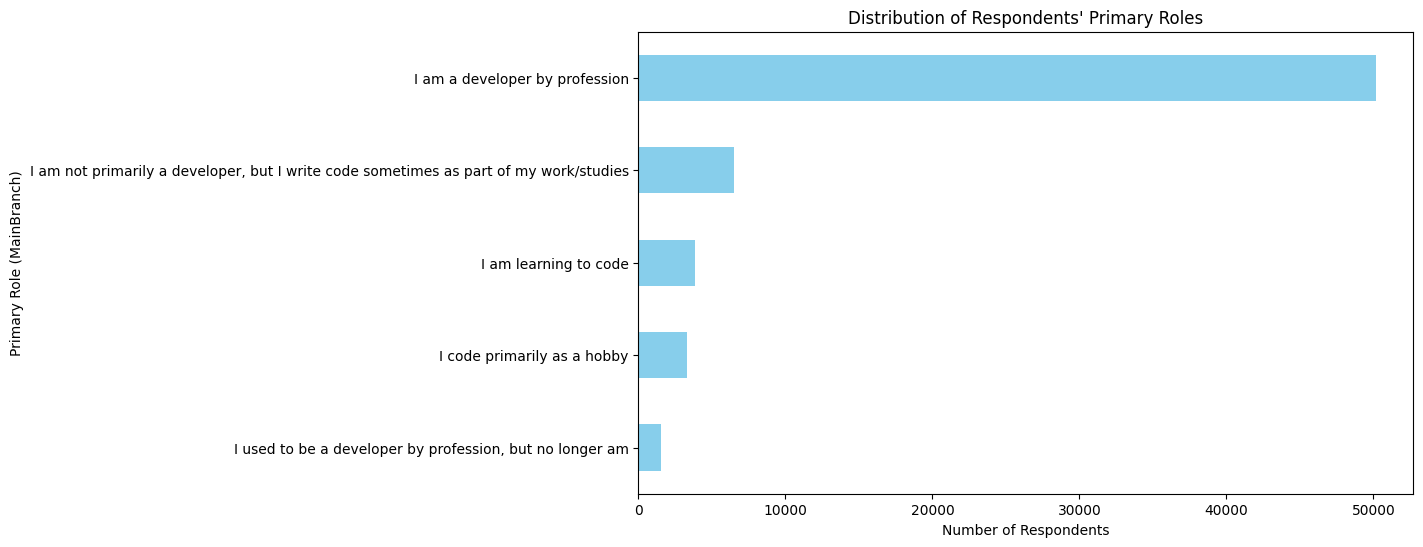

In [9]:
## Write your code here
import matplotlib.pyplot as plt

# Count the frequency of each unique value in MainBranch
main_branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10,6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.title('Distribution of Respondents\' Primary Roles')
plt.gca().invert_yaxis()  # Optional: Highest count on top
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



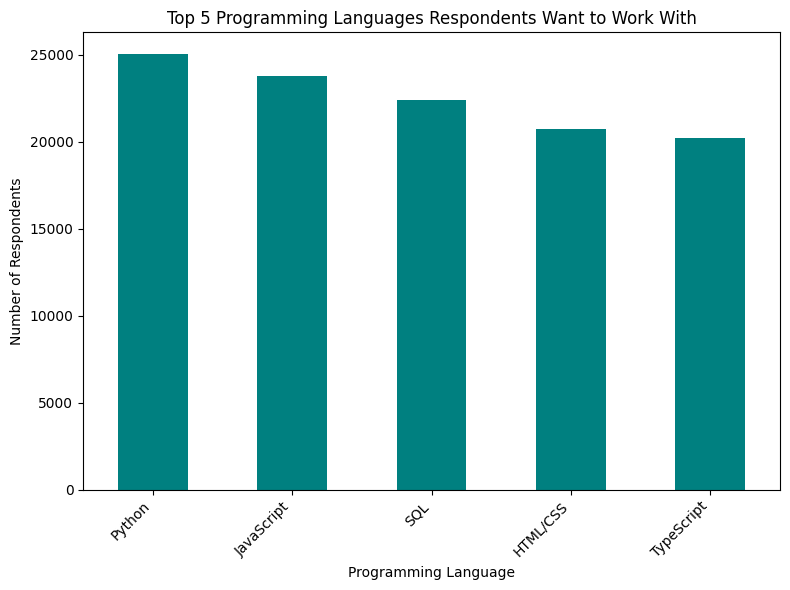

In [10]:
## Write your code here
import matplotlib.pyplot as plt

# Split the semi-colon separated values into lists, then explode into rows
langs_series = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count the top 5 most desired languages
top5_langs = langs_series.value_counts().head(5)

plt.figure(figsize=(8,6))
top5_langs.plot(kind='bar', color='teal')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


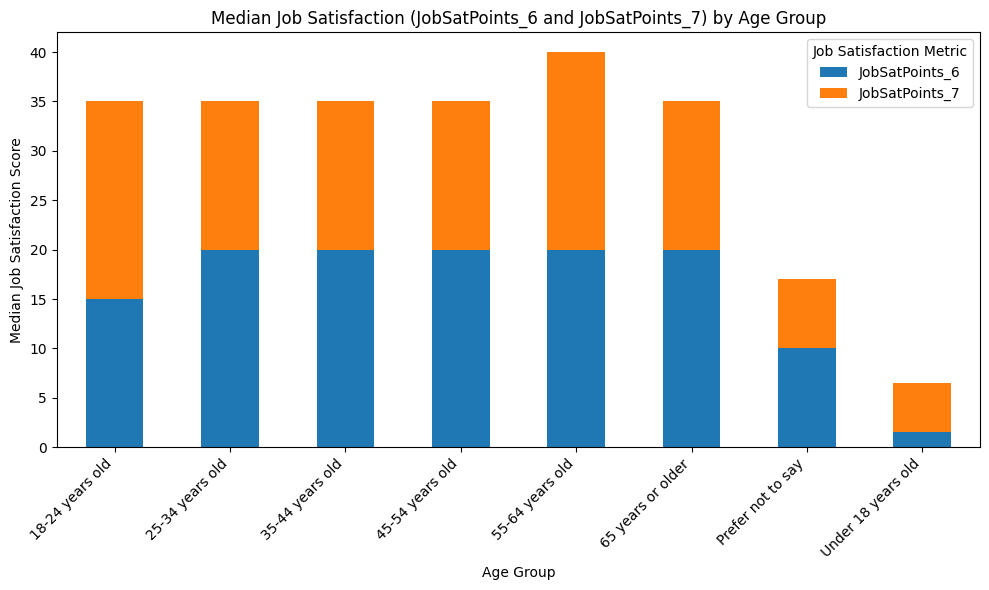

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Age and calculate median for the two job satisfaction metrics
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Plot stacked bar chart
median_job_sat.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Metric')
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



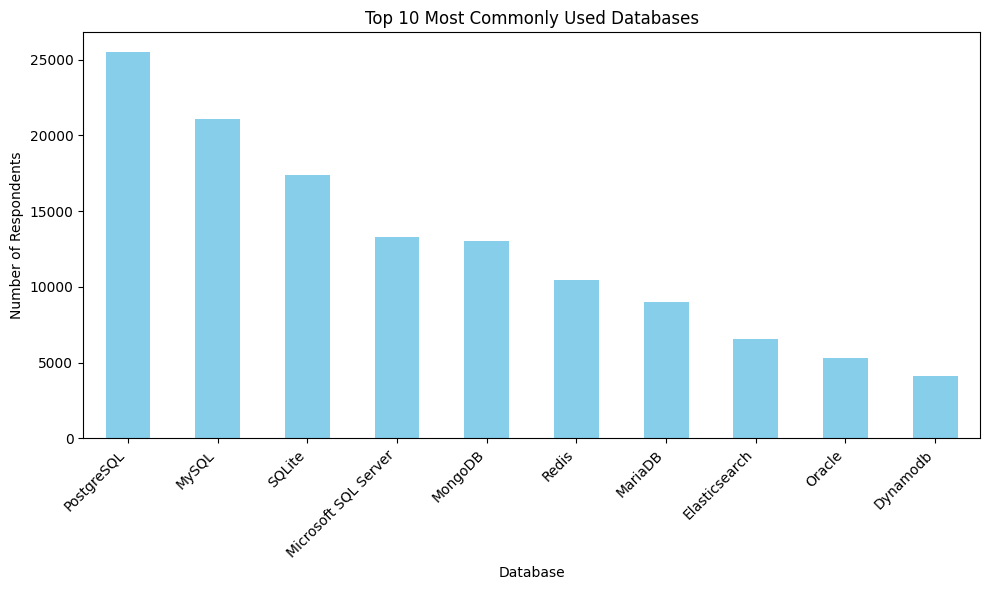

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Explode the semicolon-separated values into a flat list
databases_series = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode()

# Count the frequency of each database
db_counts = databases_series.value_counts().head(10)  # Top 10 databases

# Plot bar chart
plt.figure(figsize=(10,6))
db_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_2990/2495467567.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_by_age = df_age_comp.groupby('Age')['ConvertedCompYearly'].median()


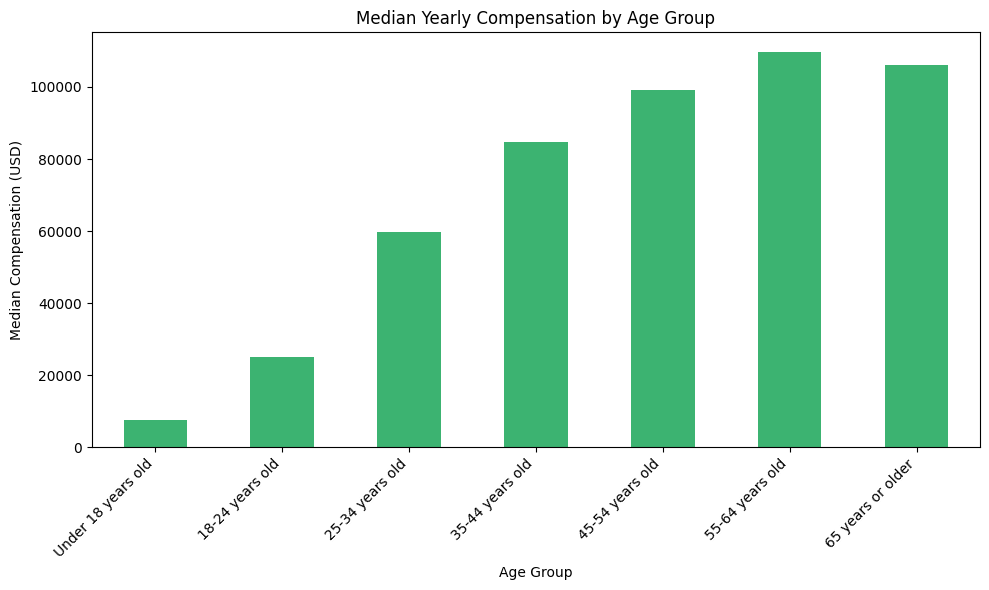

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Define a categorical order for Age groups (adjust if needed)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter relevant columns and drop rows with missing data
df_age_comp = df[['Age', 'ConvertedCompYearly']].dropna()

# Keep only rows with age groups in our order list
df_age_comp = df_age_comp[df_age_comp['Age'].isin(age_order)]

# Convert Age to categorical with ordered categories for proper sorting
df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)

# Calculate median compensation by Age group
median_comp_by_age = df_age_comp.groupby('Age')['ConvertedCompYearly'].median()

# Plot the bar chart
plt.figure(figsize=(10,6))
median_comp_by_age.plot(kind='bar', color='mediumseagreen')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



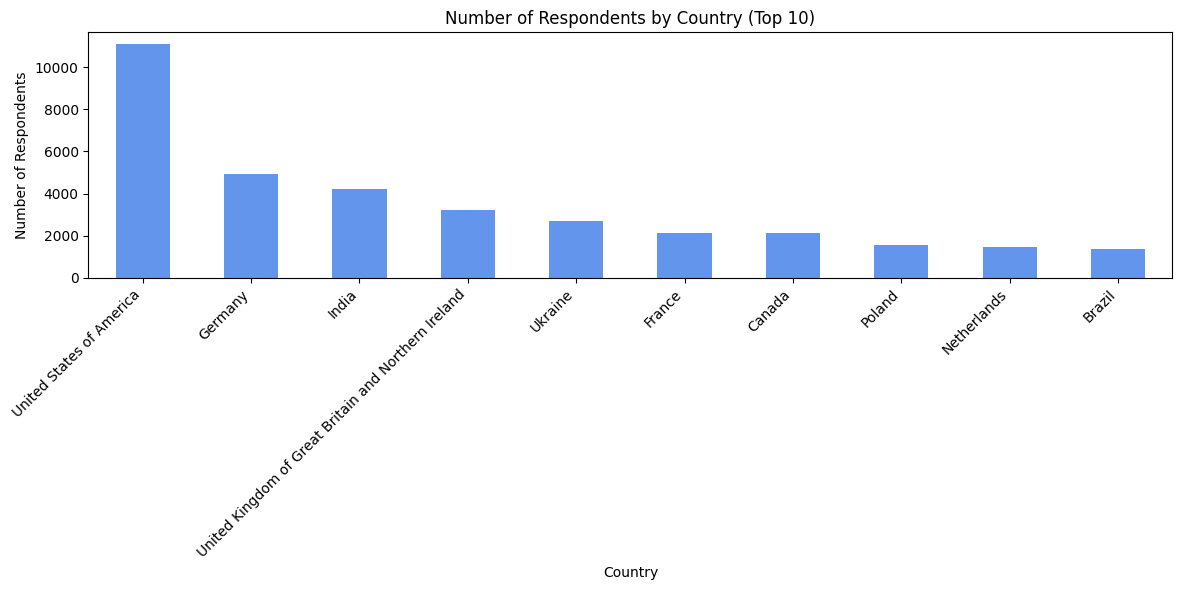

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of respondents per country
country_counts = df['Country'].value_counts().sort_values(ascending=False)

# Optional: Keep top 10 countries for better visualization
top_countries = country_counts.head(10)

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='cornflowerblue')
plt.title('Number of Respondents by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
